In [1]:
import numpy as np
import pandas as pd

In [2]:
data_file = r'C:\Users\AnitaM\Downloads\tripadvisor_hotel_reviews\tripadvisor_hotel_reviews.csv'

In [3]:
tr = pd.read_csv(data_file)

In [4]:
tr.shape

(20491, 2)

In [5]:
tr.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
tr['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
# Explore the text data with wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(['hotel', 'resort', 'day', 'time', 'room'])

In [11]:
all_reviews=' '.join(tr['Review'])

(-0.5, 399.5, 199.5, -0.5)

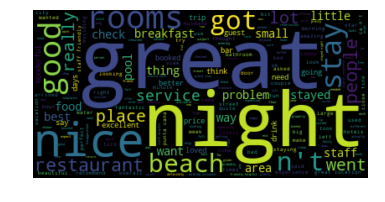

In [12]:
wordcloud = WordCloud(stopwords=stopwords).generate(all_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# Frequently used words : night, nice, people, good, restaurant

In [14]:
# Divide the reviews based on the ratings and analyse

In [15]:
tr_5_rating = tr[tr['Rating']==5]
rating_5_reviews = ' '.join(tr_5_rating['Review'])

(-0.5, 399.5, 199.5, -0.5)

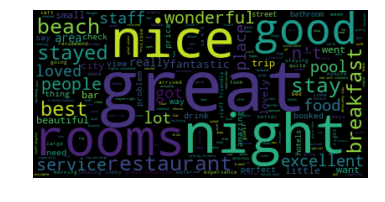

In [16]:
wordcloud = WordCloud(stopwords=stopwords).generate(rating_5_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [17]:
# Frequently used words for highest rating are day, nice, great, good, time, night, beach, breakfast, rooms.

In [18]:
tr_4_rating = tr[tr['Rating']==4]
rating_4_reviews = ' '.join(tr_4_rating['Review'])

(-0.5, 399.5, 199.5, -0.5)

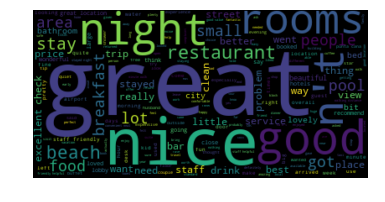

In [19]:
wordcloud = WordCloud(stopwords=stopwords).generate(rating_4_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [20]:
# Frequently used words are good, nice, resort, great, night, beach, restaurant.

In [21]:
tr_3_rating = tr[tr['Rating']==3]
rating_3_reviews = ' '.join(tr_3_rating['Review'])

(-0.5, 399.5, 199.5, -0.5)

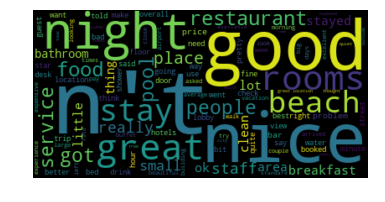

In [22]:
wordcloud = WordCloud(stopwords=stopwords).generate(rating_3_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [23]:
# Frequently used words are nice, good, night, beach, restaurant, n't. the word great is not so pronounced here.

In [24]:
tr_2_rating = tr[tr['Rating']==2]
rating_2_reviews = ' '.join(tr_2_rating['Review'])

(-0.5, 399.5, 199.5, -0.5)

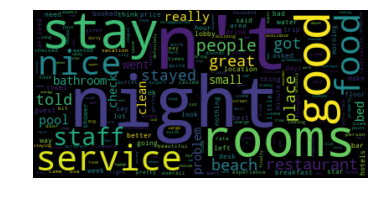

In [25]:
wordcloud = WordCloud(stopwords=stopwords).generate(rating_2_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [26]:
# Frequently used words are service, stay, food, n't, staff, people. These might have been the complain in the not so goos reviews.

In [27]:
tr_1_rating = tr[tr['Rating']==1]
rating_1_reviews = ' '.join(tr_1_rating['Review'])

(-0.5, 399.5, 199.5, -0.5)

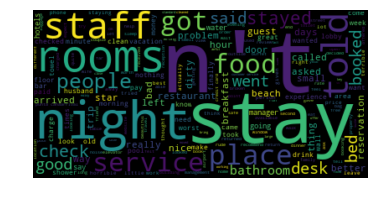

In [28]:
wordcloud = WordCloud(stopwords=stopwords).generate(rating_1_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [29]:
# Frequently used words in lowest rating : night, stay, rooms, staff, service, place, food.

In [30]:
# Analysing the sentiments of the reviews:

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [32]:
Sentiment=[]
for review in tr['Review']:
    vs = analyzer.polarity_scores(review) 
    
    if vs['pos'] > vs['neg']:
        pos_neg = 'Positive'
    if vs['neg'] > vs['pos']:
        pos_neg = 'Negative'
    Sentiment.append(pos_neg)
    
tr['Review_Sentiment'] = pd.Series(Sentiment)

In [33]:
tr.head()

,Review,Rating,Review_Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


In [34]:
tr['Review_Sentiment'].value_counts()

Positive    18796
Negative     1695
Name: Review_Sentiment, dtype: int64

In [35]:
tr_pos_review = tr[tr['Review_Sentiment']=='Positive']
tr_neg_review = tr[tr['Review_Sentiment']=='Negative']

In [36]:
tr_pos_review['Rating'].value_counts()

5    9001
4    5973
3    1993
2    1262
1     567
Name: Rating, dtype: int64

In [37]:
tr_neg_review['Rating'].value_counts()

1    854
2    531
3    191
4     66
5     53
Name: Rating, dtype: int64

In [38]:
pos_reviews = ' '.join(tr_pos_review['Review'])

(-0.5, 399.5, 199.5, -0.5)

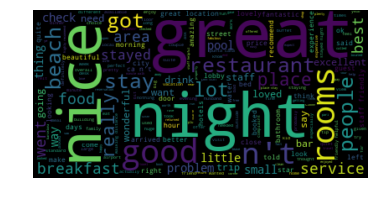

In [39]:
wordcloud = WordCloud(stopwords=stopwords).generate(pos_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [40]:
neg_reviews = ' '.join(tr_neg_review['Review'])

(-0.5, 399.5, 199.5, -0.5)

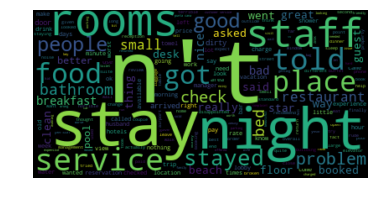

In [42]:
wordcloud = WordCloud(stopwords=stopwords).generate(neg_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")